In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from transformers import pipeline

In [ ]:
df = pd.read_csv('lahistoriaec.csv')
df_fil = df[['favorite_count', 'retweet_count', 'text', 'retweeted_status.text', 'quoted_status.text']].copy()
df_sd = df_fil.drop_duplicates(subset='text', keep='first')
df_sd.head()

,favorite_count,retweet_count,text,retweeted_status.text,quoted_status.text
0,16,10,"Después de la censura, vagancia. La caricatura...",NaN,NaN
1,53,43,Corte de Justicia de #Napo ratificó sentencia ...,NaN,NaN
2,290,95,Búsqueda implacable. La @PoliciaEcuador allanó...,NaN,NaN
3,85,41,Trabajadores de empresa de limpieza que dan se...,NaN,NaN
4,18,18,Empresa de educación de Estados Unidos abrió s...,NaN,NaN


In [ ]:
text = df_sd['text'].tolist()
#print(text)

In [ ]:
def analizar_sentimientos(textos):
  analizador_sentimientos = pipeline(
      'sentiment-analysis',
      model = 'nlptown/bert-base-multilingual-uncased-sentiment'
  )

  resultados = analizador_sentimientos(textos)
  return resultados

In [ ]:
rankings = analizar_sentimientos(text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
#print(rankings)
starts = [item['label'] for item in rankings]
#print(starts)
df_sd['starts'] = starts
df_sd = df_sd[['favorite_count', 'retweet_count', 'text', 'starts']]

<ipython-input-8-019824155a70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd['starts'] = starts


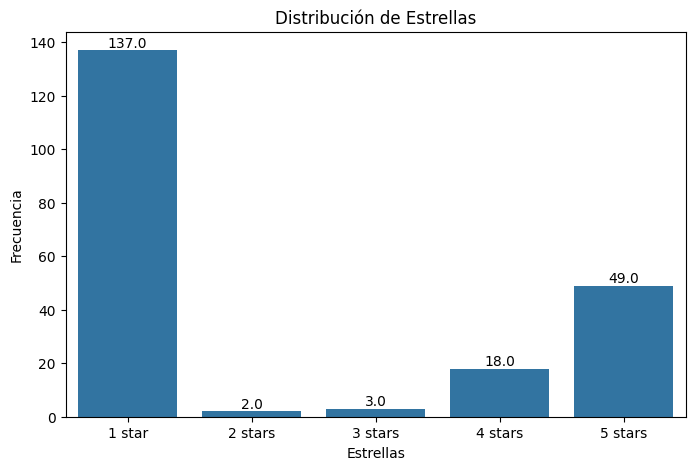

In [ ]:
df_sd['starts'] = pd.Categorical(df_sd['starts'], categories=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], ordered=True)
df_sd
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_sd, x='starts', order=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribución de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


Se va a comparar la cantidad de 'favorite_count' que obtuvieron los tweets de acuerdo a la clasificación de estrellas que se le dieron, tomando como métrica la media de 'favorite_count', se asume que los tweets con menos estrellas deberían tener menos interacciones?

In [ ]:
df_s1 = df_sd[df_sd['starts'] == '1 star']
df_s2 = df_sd[df_sd['starts'] == '2 stars']
df_s3 = df_sd[df_sd['starts'] == '3 stars']
df_s4 = df_sd[df_sd['starts'] == '4 stars']
df_s5 = df_sd[df_sd['starts'] == '5 stars']

data_frames = [df_s1, df_s2, df_s3, df_s4, df_s5]
count = 0

for df in data_frames:
  count += 1
  media_pond = df['favorite_count'].mean() * len(df)/len(df_sd)
  print(f"La media ponderada de 'favorite_count' para el la clasificación de {count} estrella es: {round(media_pond, 0)}")
  print(f"La media de 'favorite_count' para el la clasificación de {count} estrella es: {df['favorite_count'].mean()}")


La media ponderada de 'favorite_count' para el la clasificación de 1 estrella es: 57.0
La media de 'favorite_count' para el la clasificación de 1 estrella es: 86.52554744525547
La media ponderada de 'favorite_count' para el la clasificación de 2 estrella es: 1.0
La media de 'favorite_count' para el la clasificación de 2 estrella es: 123.0
La media ponderada de 'favorite_count' para el la clasificación de 3 estrella es: 9.0
La media de 'favorite_count' para el la clasificación de 3 estrella es: 638.0
La media ponderada de 'favorite_count' para el la clasificación de 4 estrella es: 7.0
La media de 'favorite_count' para el la clasificación de 4 estrella es: 81.16666666666667
La media ponderada de 'favorite_count' para el la clasificación de 5 estrella es: 35.0
La media de 'favorite_count' para el la clasificación de 5 estrella es: 148.83673469387756


In [ ]:
from openai import OpenAI
#OPENAI_KEY = Here insert your key
client = OpenAI(
  organization='org-8AghacFhYbrLH96uY8obz0Z2',
  project='proj_IWuNJKJuCbFd4ZOh6IOldtkB',
  api_key = OPENAI_KEY
)

In [ ]:
import openai
import json
# Configuración de la API
openai.api_key = OPENAI_KEY
messages = []
messages.append({
     "role": "system",
      "content": "Eres un psicologo experto en redes sociales, comportamiento social y en el lneguaje, trabajas para una agencia de comunicación"
})

In [ ]:
tweets_str = json.dumps(text, ensure_ascii=False)
print(tweets_str)

["Después de la censura, vagancia. La caricatura de la política de @AsdrubaldlTorre: https://t.co/FRDMkQCYO1", "Corte de Justicia de #Napo ratificó sentencia de diez días de prisión y el pago del 25% de un salario básico en con… https://t.co/Mmyp7TNkYC", "Búsqueda implacable. La @PoliciaEcuador allanó vivienda donde habitaba la pareja responsable de asaltos armados y r… https://t.co/bcClEEIzsj", "Trabajadores de empresa de limpieza que dan servicio en el hospital de #Calderón protestaron en #Quito porque se le… https://t.co/X5rAM27zXN", "Empresa de educación de Estados Unidos abrió sus postulaciones para contratar profesores de países latinoamericanos… https://t.co/wgcwe4iTSl", "Los \"alvaristas\" siguen haciendo a diario plantones en las afueras del @cnegobec para exigir que se permita la cand… https://t.co/kpdJHWYJwZ", "El reguetonero #Wisin pide perdón por el machismo en las letras de sus canciones: \"Si ofendimos a cualquier mujer,… https://t.co/pZOby6rdcp", "La Defensoría del Pueb

In [ ]:
messages = [
    {
        "role": "system",
        "content": "Eres un experto en análisis político y social, con experiencia en redes sociales y opinión pública. \
        Trabajas para una agencia de comunicación y tu tarea es analizar tweets para clasificarlos en cinco categorías \
        según su contenido y temática. Define las categorías basándote en los temas predominantes en los tweets."
    },
    {
        "role": "user",
        "content": f"Aquí tienes una lista de tweets en formato JSON: {tweets_str}. \
        Devuelve un JSON donde cada tweet esté asignado a una de cinco categorías que determines según su contenido, devuelve solo las categorías de cada tweet, sin el tweet. \
        No olvides que solo son 5 categorías en la que va cada tweet, no pueden pasar de eso. Asegúrate de clasificar los 209 tweets sin comentarios adicionales."
    }
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)
response_text = response.choices[0].message.content

In [ ]:
import re
caracteres_a_eliminar = "[`\n]"
resultado = re.sub(caracteres_a_eliminar, "", response_text)
resultado = resultado.replace("json", "")
print(resultado)

[    "Política y Gobierno",    "Justicia y Crímenes",    "Justicia y Crímenes",    "Protestas y Manifestaciones",    "Oportunidades y Educación",    "Protestas y Manifestaciones",    "Cultura y Sociedad",    "Derechos Humanos",    "Cultura y Sociedad",    "Economía y Negocios",    "Justicia y Crímenes",    "Entretenimiento",    "Justicia y Crímenes",    "Justicia y Crímenes",    "Política y Gobierno",    "Justicia y Crímenes",    "Justicia y Crímenes",    "Política y Gobierno",    "Protestas y Manifestaciones",    "Justicia y Crímenes",    "Política y Gobierno",    "Justicia y Crímenes",    "Economía y Negocios",    "Política y Gobierno",    "Cultura y Sociedad",    "Política y Gobierno",    "Justicia y Crímenes",    "Economía y Negocios",    "Justicia y Crímenes",    "Política y Gobierno",    "Justicia y Crímenes",    "Justicia y Crímenes",    "Política y Gobierno",    "Cultura y Sociedad",    "Cultura y Sociedad",    "Justicia y Crímenes",    "Protestas y Manifestaciones",    "Cultur

In [ ]:
data_list = json.loads(resultado)
serie = pd.Series(data_list)
serie.unique()

array(['Política y Gobierno', 'Justicia y Crímenes',
       'Protestas y Manifestaciones', 'Oportunidades y Educación',
       'Cultura y Sociedad', 'Derechos Humanos', 'Economía y Negocios',
       'Entretenimiento'], dtype=object)

<ipython-input-45-ee5dc4466144>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette="viridis")


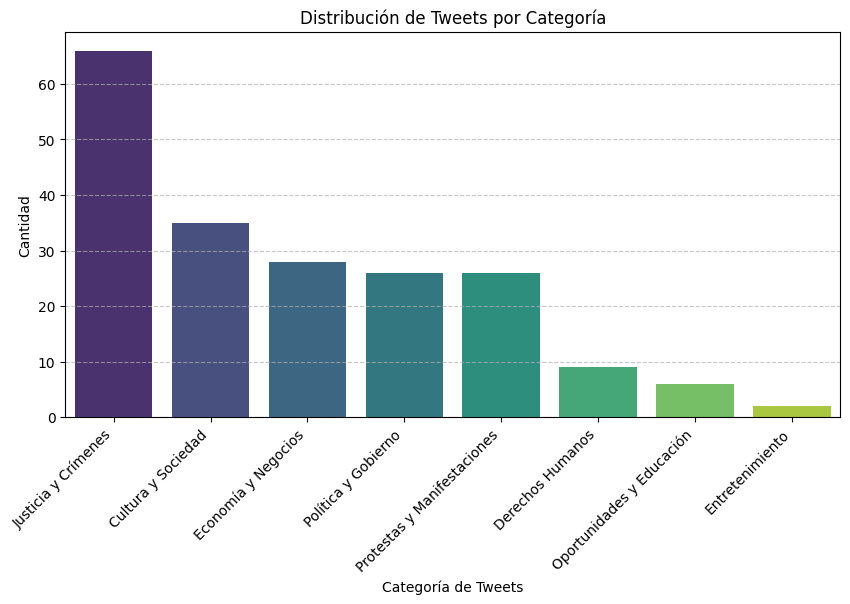

In [ ]:

from collections import Counter
# Contar la cantidad de tweets en cada categoría
conteo_categorias = Counter(serie)

# Ordenar categorías en orden descendente
ordenado = sorted(conteo_categorias.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*ordenado)

# Configurar el gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values), palette="viridis")

# Personalización
plt.xlabel("Categoría de Tweets")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.title("Distribución de Tweets por Categoría")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()